# Homework 1

**Start date:** *18th Jan 2017*

**Due date:** *04 February 2017, 11:55 pm*

## How to Submit

When you have completed the exercises and everything has finsihed running, click on 'File' in the menu-bar and then 'Download .ipynb'. This file must be submitted to Moodle named as **studentnumber_DL_hw1.ipynb** before the deadline above.

Also send a **sharable link** to the notebook at the following email: ucl.coursework.submit@gmail.com. You can also make it sharable via link to everyone, up to you.

### IMPORTANT
Please make sure you submission includes **all results/plots/tables** required for grading. We will not re-run your code.

## The Data

### Handwritten Digit Recognition Dataset (MNIST)

In this assignment we will be using the [MNIST digit dataset](https://yann.lecun.com/exdb/mnist/). 

The dataset contains images of hand-written digits ($0-9$), and the corresponding labels. 

The images have a resolution of $28\times 28$ pixels.

### The MNIST Dataset in TensorFlow

You can use the tensorflow build-in functionality to download and import the dataset into python (see *Setup* section below).

## The Assignment

### Objectives

You will use TensorFlow to implement several neural network models (labelled Model 1-4, and described in the corresponding sections of the Colab).

You will then train these models to classify hand written digits from the Mnist dataset.

### Variable Initialization

Initialize the variables containing the parameters using [Xavier initialization](http://proceedings.mlr.press/v9/glorot10a.html).

    initializer = tf.contrib.layers.xavier_initializer()
    my_variable = tf.Variable(initializer(shape))

### Hyper-parameters

For each of these models you will be requested to run experiments with different hyper-parameters.

More specifically, you will be requested to try 3 sets of hyper-parameters per model, and report the resulting model accuracy.

Each combination of hyper-parameter will specify how to set each of the following:

- **num_epochs**: Number of iterations through the training section of the dataset [*a positive integer*].

- **learning_rate**: Learning rate used by the gradient descent optimizer [*a scalar between 0 and 1*]

In all experiments use a *batch_size* of 100.

### Loss function
All models, should be trained as to minimize the **cross-entropy loss** function:
$$
\mathrm{loss}
~~=~~
-\sum_{i=1}^N \log p(y_i|x_i, \theta)
~~=~~
-\sum_{i=1}^N \log{ \underbrace{\left(\frac{\exp(z_{i}[y_i])}{\sum_{c=1}^{10} \exp(z_{i}[c])}\right)}_{\text{softmax output}}}
~~=~~
\sum_{i=1}^N \left( -z_{i}[y_i] + \log{\left( \sum_{c=1}^{10} \exp(z_{i}[c]) \right)} \right)$$
where $z \in \mathbb{R}^{10}$ is the input to the softmax layer and $z{[c]}$ denotes the $c$-th entry of vector $z$. And $i$ is a index for the dataset $\{(x_i, y_i)\}_{i=1}^N$.

*Note*: Sum the loss across the elements of the batch with tf.reduce_sum().

*Hint*: read about TensorFlow's [tf.nn.softmax_cross_entropy_with_logits](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits) function.

### Optimization

Use **stochastic gradient descent (SGD)** for optimizing the loss function.

Hint: read about TensorFlow's [tf.train.GradientDescentOptimizer()](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer).


### Training and Evaluation

The tensorflow built-in functionality for downloading and importing the dataset into python returns a Datasets object.

This object will have three attributes: 

- train

- validation

- test

Use only the **train** data in order to optimize the model.

Use *datasets.train.next_batch(100)* in order to sample mini-batches of data.

Every 20000 training samples (i.e. every 200 updates to the model), interrupt training and measure the accuracy of the model, 

each time evaluate the accuracy of the model both on 20% of the **train** set and on the entire **test** set.

### Reporting

For each model i, you will collect the learning curves associated to each combination of hyper-parameters.

Use the utility function `plot_learning_curves` to plot these learning curves,

and the and utility function `plot_summary_table` to generate a summary table of results.

For each run collect the train and test curves in a tuple, together with the hyper-parameters.

    experiments_task_i = [

       (num_epochs_1, learning_rate_1), train_accuracy_1, test_accuracy_1),
    
       (num_epochs_2, learning_rate_2), train_accuracy_2, test_accuracy_2),
    
       (num_epochs_3, learning_rate_3), train_accuracy_3, test_accuracy_3)]

### Hint 

If you need some extra help, familiarizing yourselves with the dataset and the task of building models in TensorFlow, you can check the [TF tutorial for MNIST](https://www.tensorflow.org/tutorials/mnist/beginners/). 

The tutorial will walk you through the MNIST classification task step-by-step, building and optimizing a model in TensorFlow. 

(Please do not copy the provided code, though. Walk through the tutorial, but write your own implementation).

# Imports and utility functions (do not modify!)

In [ ]:
# Import useful libraries.
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

# Global variables.
log_period_samples = 20000
batch_size = 100

# Import dataset with one-hot encoding of the class labels.
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders to feed train and test data into the graph.
# Since batch dimension is 'None', we can reuse them both for train and eval.
def get_placeholders():
  x = tf.placeholder(tf.float32, [None, 784])
  y_ = tf.placeholder(tf.float32, [None, 10])
  return x, y_

# Plot learning curves of experiments
def plot_learning_curves(experiment_data):
  # Generate figure.
  fig, axes = plt.subplots(3, 4, figsize=(22,12))
  st = fig.suptitle(
      "Learning Curves for all Tasks and Hyper-parameter settings",
      fontsize="x-large")
  # Plot all learning curves.
  for i, results in enumerate(experiment_data):
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      # Plot.
      xs = [x * log_period_samples for x in range(1, len(train_accuracy)+1)]
      axes[j, i].plot(xs, train_accuracy, label='train_accuracy')
      axes[j, i].plot(xs, test_accuracy, label='test_accuracy')
      # Prettify individual plots.
      axes[j, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
      axes[j, i].set_xlabel('Number of samples processed')
      axes[j, i].set_ylabel('Epochs: {}, Learning rate: {}.  Accuracy'.format(*setting))
      axes[j, i].set_title('Task {}'.format(i + 1))
      axes[j, i].legend()
  # Prettify overall figure.
  plt.tight_layout()
  st.set_y(0.95)
  fig.subplots_adjust(top=0.91)
  plt.show()

# Generate summary table of results.
def plot_summary_table(experiment_data):
  # Fill Data.
  cell_text = []
  rows = []
  columns = ['Setting 1', 'Setting 2', 'Setting 3']
  for i, results in enumerate(experiment_data):
    rows.append('Model {}'.format(i + 1))
    cell_text.append([])
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      cell_text[i].append(test_accuracy[-1])
  # Generate Table.
  fig=plt.figure(frameon=False)
  ax = plt.gca()
  the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
  the_table.scale(1, 4)
  # Prettify.
  ax.patch.set_facecolor('None')
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

# Model 1 (20 pts)

### Model

Train a neural network model consisting of 1 linear layer, followed by a softmax:

(input $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.0001

- *num_epochs*=5, *learning_rate*=0.005

- *num_epochs*=5, *learning_rate*=0.1

In [ ]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task1 = []
settings = [(5, 0.0001), (5, 0.005), (5, 0.1)]

In [3]:
print('Training Model 1')
with tf.device('/device:GPU:0'):
  # Train Model 1 with the different hyper-parameter settings.
  for (num_epochs, learning_rate) in settings:
      print("Number of epochs and learning rate:", (num_epochs, learning_rate))

      # Reset graph, recreate placeholders and dataset.
      tf.reset_default_graph()
      # Runs previously defined function to get placeholders
      x, y_ = get_placeholders()
      # Reads in the train and test data
      mnist = get_data()
      eval_mnist = get_data()

      #####################################################
      # Define model, loss, update and evaluation metric. #
      #####################################################

      # Weights for layer
      W = tf.get_variable("W", shape=[784,10], initializer = tf.contrib.layers.xavier_initializer())
      # Biases for layer
      b = tf.get_variable("b", [10], initializer = tf.zeros_initializer())
      # Define model
      y = tf.add(tf.matmul(x, W), b) # Applies linear layer and softmax layer at the same time
      # Define loss - cross entropy loss
      
      cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))
      # Define update
      train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
      # Define evaluation metric
      correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1)) # The 1 turns boolean into binary
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

      # Train.
      i, train_accuracy, test_accuracy = 0, [], []
      log_period_updates = int(log_period_samples / batch_size)
      with tf.train.MonitoredSession() as sess:
          while mnist.train.epochs_completed < num_epochs:


              # Update.
              i += 1
              batch_xs, batch_ys = mnist.train.next_batch(batch_size)

              #################
              # Training step #
              #################
              sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

              # Periodically evaluate.
              if i % log_period_updates == 0:

                  #####################################
                  # Compute and store train accuracy. #
                  #####################################
                  train_acc = sess.run(accuracy, feed_dict= {x: eval_mnist.train.images, 
                                                             y_: eval_mnist.train.labels})
                  train_accuracy.append(train_acc)
                  print("Train accuracy:", train_acc)

                  #####################################
                  # Compute and store test accuracy.  #
                  #####################################  
                  test_acc = sess.run(accuracy, feed_dict={x: eval_mnist.test.images,
                                                          y_: eval_mnist.test.labels})
                  test_accuracy.append(test_acc)
                  print("Test accuracy:", test_acc)

      # Appends train accuracy and test accuracy 
      experiments_task1.append(
          ((num_epochs, learning_rate), train_accuracy, test_accuracy))


Training Model 1
Number of epochs and learning rate: (5, 0.0001)
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Train accuracy: 0.7606
Test accuracy: 0.7731
Train accuracy: 0.81276363
Test accuracy: 0.8244
Train accuracy: 0.8360182
Test accuracy: 0.8487
Train accuracy: 0.84632725
Test accuracy: 0.8565
Train accuracy: 0.8552
Test accuracy: 0.8667
Train accuracy: 0.8593091
Test accuracy: 0.8706
Train 

# Model 2 (20 pts)

1 hidden layer (32 units) with a ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=15, *learning_rate*=0.0001

- *num_epochs*=15, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1 

In [ ]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task2 = []
settings = [(15, 0.0001), (15, 0.005), (15, 0.1)]

In [5]:
print('Training Model 2')

# Train Model 2 with the different hyper-parameter settings.
with tf.device('/device:GPU:0'):
  for (num_epochs, learning_rate) in settings:

      # Reset graph, recreate placeholders and dataset.
      tf.reset_default_graph()  # reset the tensorflow graph
      x, y_ = get_placeholders()
      mnist = get_data()  # use for training.
      eval_mnist = get_data()  # use for evaluation.

      #####################################################
      # Define model, loss, update and evaluation metric. #
      #####################################################
      # Weights for hidden layer
      W1 = tf.get_variable("W1", shape=[784, 32], initializer = tf.contrib.layers.xavier_initializer())
      # Biases for hidden layer
      b1 = tf.get_variable("b1", [32], initializer = tf.zeros_initializer())
      # Weights for output layer
      W2 = tf.get_variable("W2", shape=[32, 10], initializer = tf.contrib.layers.xavier_initializer())
      # Biases for output layer
      b2 = tf.get_variable("b2", [10], initializer = tf.zeros_initializer())
      # Output first hidden layer - with relu activation 
      A1 = tf.nn.relu(tf.add(tf.matmul(x, W1), b1))
      # Final output
      y = tf.add(tf.matmul(A1, W2), b2)

      # Define loss - cross entropy loss
      cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))
      # Define update
      train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
      # Define evaluation metric
      correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1)) # The 1 turns boolean into binary
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


      # Train.
      i, train_accuracy, test_accuracy = 0, [], []
      log_period_updates = int(log_period_samples / batch_size)
      with tf.train.MonitoredSession() as sess:
          while mnist.train.epochs_completed < num_epochs:


              # Update
              i += 1
              batch_xs, batch_ys = mnist.train.next_batch(batch_size)

              #################
              # Training step #
              #################
              sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

              # Periodically evaluate.
              if i % log_period_updates == 15:

                  #####################################
                  # Compute and store train accuracy. #
                  #####################################
                  train_acc = sess.run(accuracy, feed_dict= {x: eval_mnist.train.images, y_: eval_mnist.train.labels})
                  train_accuracy.append(train_acc)
                  print("Train accuracy:", train_acc)
                  #####################################
                  # Compute and store test accuracy.  #
                  #####################################
                  test_acc = sess.run(accuracy, feed_dict={x: eval_mnist.test.images,
                                        y_: eval_mnist.test.labels})
                  test_accuracy.append(test_acc)
                  print("Test accuracy:", test_acc)
      experiments_task2.append(
          ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 2
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Train accuracy: 0.12438182
Test accuracy: 0.1245
Train accuracy: 0.7262727
Test accuracy: 0.7338
Train accuracy: 0.8148182
Test accuracy: 0.8225
Train accuracy: 0.84023637
Test accuracy: 0.8501
Train accuracy: 0.85809094
Test accuracy: 0.865
Train accuracy: 0.8678182
Test accuracy: 0.8762
Train accuracy: 0.8750727
Test accuracy: 0.8847
Train accuracy: 0.8813273
Test accuracy: 0.8899
Train accuracy: 0.8858182
Test accuracy: 0.8935
Train accuracy: 0.89018184
Test accuracy: 0.8976
Train accuracy: 0.8927091
Test accuracy: 0.9013
Train accuracy: 0.89605457
Test accuracy: 0.9031
Train accuracy:

# Model 3 (20 pts)

2 hidden layers (32 units) each, with ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.003

- *num_epochs*=40, *learning_rate*=0.003

- *num_epochs*=40, *learning_rate*=0.05

In [ ]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task3 = []
settings = [(5, 0.003), (40, 0.003), (40, 0.05)]

In [7]:
print('Training Model 3')

# Train Model 3 with the different hyper-parameter settings.
with tf.device('/device:GPU:0'):
  for (num_epochs, learning_rate) in settings:

    # Reset graph, recreate placeholders and dataset.
    tf.reset_default_graph()  # reset the tensorflow graph
    x, y_ = get_placeholders()
    mnist = get_data()  # use for training.
    eval_mnist = get_data()  # use for evaluation.

    #####################################################
    # Define model, loss, update and evaluation metric. #
    #####################################################
    # Weights for hidden layer 1
    W1 = tf.get_variable("W1", shape=[784, 32], initializer = tf.contrib.layers.xavier_initializer())
    # Biases for hidden layer 1
    b1 = tf.get_variable("b1", [32], initializer = tf.zeros_initializer())
    # Weights for hidden layer 2
    W2 = tf.get_variable("W2", shape=[32, 32], initializer = tf.contrib.layers.xavier_initializer())
    # Biases for hidden layer 2
    b2 = tf.get_variable("b2", [32], initializer = tf.zeros_initializer())
    # Weights for output layer
    W3 = tf.get_variable("W3", shape=[32, 10], initializer = tf.contrib.layers.xavier_initializer())
    # Biases for output layer
    b3 = tf.get_variable("b3", [10], initializer = tf.zeros_initializer())

    # Output hidden layers - with relu activation 
    hidden_1 = tf.nn.relu(tf.add(tf.matmul(x, W1),b1))
    hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W2),b2))
    # Final output
    y = tf.add(tf.matmul(hidden_2, W3),b3)

    # Define loss - cross entropy loss
    cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))
    # Define update
    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    # Define evaluation metric
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1)) # The 1 turns boolean into binary
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


    # Train.
    i, train_accuracy, test_accuracy = 0, [], []
    log_period_updates = int(log_period_samples / batch_size)
    with tf.train.MonitoredSession() as sess:
      while mnist.train.epochs_completed < num_epochs:

        # Update.
        i += 1
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        #################
        # Training step #
        #################
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
        # Periodically evaluate.
        if i % log_period_updates == 0:


          #####################################
          # Compute and store train accuracy. #
          #####################################
          train_acc = sess.run(accuracy, feed_dict= {x: eval_mnist.train.images, 
                                                     y_: eval_mnist.train.labels})
          train_accuracy.append(train_acc)
          print("Train accuracy:", train_acc)

          #####################################
          # Compute and store test accuracy.  #
          #####################################  
          test_acc = sess.run(accuracy, feed_dict={x: eval_mnist.test.images,
                                                  y_: eval_mnist.test.labels})
          test_accuracy.append(test_acc)
          print("Test accuracy:", test_acc)

      experiments_task3.append(
          ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 3
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Train accuracy: 0.89132726
Test accuracy: 0.8969
Train accuracy: 0.92343634
Test accuracy: 0.9246
Train accuracy: 0.9470182
Test accuracy: 0.9466
Train accuracy: 0.9438364
Test accuracy: 0.9407
Train accuracy: 0.95812726
Test accuracy: 0.9551
Train accuracy: 0.9587455
Test accuracy: 0.9539
Train accuracy: 0.96605456
Test accuracy: 0.9609
Train accuracy: 0.9633818
Test accuracy: 0.9602
Train accuracy: 0.9691273
Test accuracy: 0.9633
Train accuracy: 0.9624
Test accuracy: 0.9575
Train accuracy: 0.9723455
Test accuracy: 0.9677
Train accuracy: 0.96901816
Test accuracy: 0.9609
Train accuracy: 0

# Model 4 (20 pts)

### Model
3 layer convolutional model (2 convolutional layers followed by max pooling) + 1 non-linear layer (32 units), followed by softmax. 

(input(28x28) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ flatten $\rightarrow$ non-linear $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


- Use *padding = 'SAME'* for both the convolution and the max pooling layers. 

- Employ plain convolution (no stride) and for max pooling operations use 2x2 sliding windows, with no overlapping pixels (note: this operation will down-sample the input image by 2x2).

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- num_epochs=5, learning_rate=0.01

- num_epochs=10, learning_rate=0.001

- num_epochs=20, learning_rate=0.001 


In [ ]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task4 = []
settings = [(5, 0.01), (10, 0.001), (20, 0.001)]

In [9]:
print('Training Model 4')

# Train Model 1 with the different hyper-parameter settings.
with tf.device('/device:GPU:0'):
  for (num_epochs, learning_rate) in settings:
      # Reset graph, recreate placeholders and dataset.
      tf.reset_default_graph()  # reset the tensorflow graph
      x, y_ = get_placeholders()
      x_image = tf.reshape(x, [-1, 28, 28, 1])
      mnist = get_data()  # use for training.
      eval_mnist = get_data()  # use for evaluation.

      #####################################################
      # Define model, loss, update and evaluation metric. #
      #####################################################

      def conv2d(x, W):
          return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

      def max_pool_2x2(x):
          return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

      # First convolutional layer
      W_conv1 = tf.get_variable("W_conv1", shape=[3, 3, 1, 8], initializer = tf.contrib.layers.xavier_initializer())
      b_conv1 = tf.get_variable("b_conv1", [8], initializer = tf.zeros_initializer())
      h_conv1 = tf.add(conv2d(x_image, W_conv1), b_conv1)
      h_pool1 = max_pool_2x2(h_conv1)
      # Second convolutional layer
      W_conv2 = tf.get_variable("W_conv2", shape=[3, 3, 8, 8], initializer = tf.contrib.layers.xavier_initializer())
      b_conv2 = tf.get_variable("b_conv2", [8], initializer = tf.zeros_initializer())
      h_conv2 = tf.add(conv2d(h_pool1, W_conv2), b_conv2)
      h_pool2 = max_pool_2x2(h_conv2)
      # Flatten 
      W_fc1 = tf.get_variable("W_fc1", shape=[7 * 7 * 8, 1024], initializer = tf.contrib.layers.xavier_initializer())
      b_fc1 = tf.get_variable("b_fc1", [1024], initializer = tf.zeros_initializer())
      h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*8])
      h_fc1 = tf.nn.relu(tf.add(tf.matmul(h_pool2_flat, W_fc1), b_fc1))
      # Non-linear layer
      W_fc2 = tf.get_variable("W_fc2", shape=[1024, 32], initializer = tf.contrib.layers.xavier_initializer())
      b_fc2 = tf.get_variable("b_fc2", [32], initializer = tf.zeros_initializer())
      h_fc2 = tf.nn.relu(tf.add(tf.matmul(h_fc1, W_fc2),b_fc2))
      # Linear layer
      W_fc3 = tf.get_variable("W_fc3", shape=[32, 10], initializer = tf.contrib.layers.xavier_initializer())
      b_fc3 = tf.get_variable("b1", [10], initializer = tf.zeros_initializer())
      y = tf.add(tf.matmul(h_fc2, W_fc3), b_fc3)

      # Define loss - cross entropy loss
      cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))
      # Define update
      train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
      # Define evaluation metric
      correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1)) # The 1 turns boolean into binary
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

      # Train.
      i, train_accuracy, test_accuracy = 0, [], []
      log_period_updates = int(log_period_samples / batch_size)
      with tf.train.MonitoredSession() as sess:
          while mnist.train.epochs_completed < num_epochs:
              # Update.
              i += 1
              batch_xs, batch_ys = mnist.train.next_batch(batch_size)

              #################
              # Training step #
              #################
              sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

              # Periodically evaluate.
              if i % log_period_updates == 0:
                  #####################################
                  # Compute and store train accuracy. #
                  #####################################
                  train_acc = sess.run(accuracy, feed_dict= {x: eval_mnist.train.images, 
                                                             y_: eval_mnist.train.labels})
                  train_accuracy.append(train_acc)
                  print("Train accuracy:", train_acc)

                  #####################################
                  # Compute and store test accuracy.  #
                  #####################################  
                  test_acc = sess.run(accuracy, feed_dict={x: eval_mnist.test.images,
                                                          y_: eval_mnist.test.labels})
                  test_accuracy.append(test_acc)
                  print("Test accuracy:", test_acc)

      experiments_task4.append(
          ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 4
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Train accuracy: 0.10250909
Test accuracy: 0.101
Train accuracy: 0.10250909
Test accuracy: 0.101
Train accuracy: 0.11234546
Test accuracy: 0.1135
Train accuracy: 0.11234546
Test accuracy: 0.1135
Train accuracy: 0.09916364
Test accuracy: 0.1009
Train accuracy: 0.11234546
Test accuracy: 0.1135
Train accuracy: 0.11234546
Test accuracy: 0.1135
Train accuracy: 0.09798182
Test accuracy: 0.0974
Train accuracy: 0.10250909
Test accuracy: 0.101
Train accuracy: 0.11234546
Test accuracy: 0.1135
Train accuracy: 0.10250909
Test accuracy: 0.101
Train accuracy: 0.11234546
Test accuracy: 0.1135
Train accur

# Results

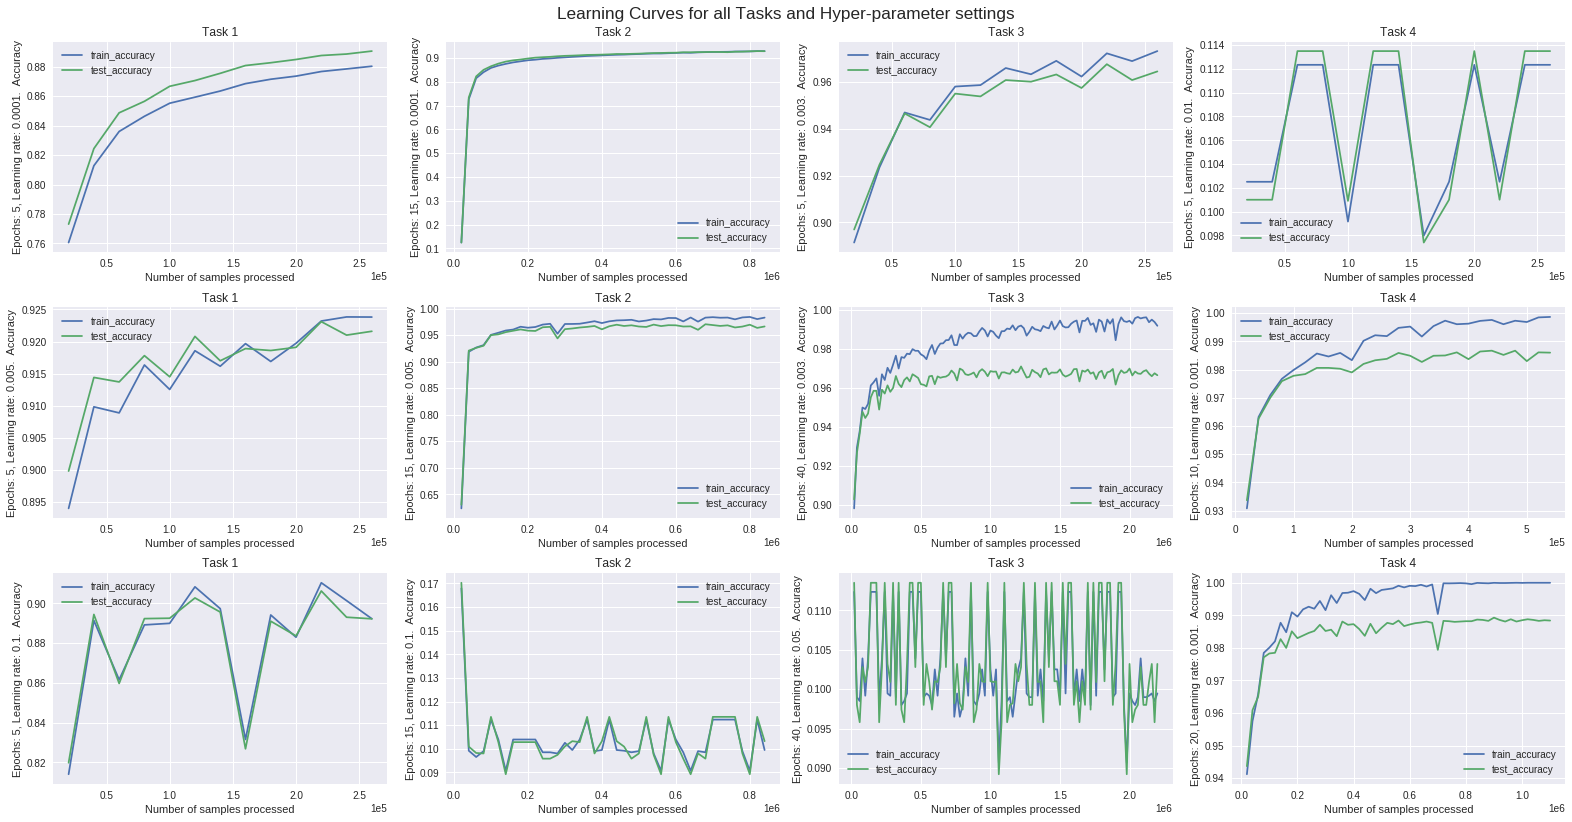

In [10]:
plot_learning_curves([experiments_task1, experiments_task2, experiments_task3, experiments_task4])

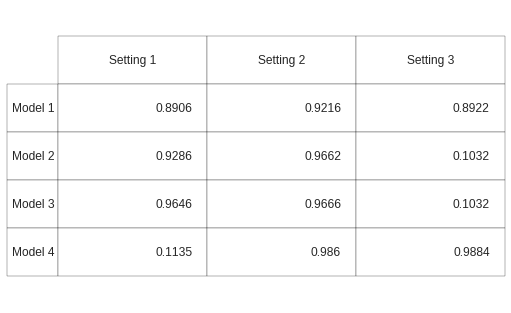

In [11]:
plot_summary_table([experiments_task1, experiments_task2, experiments_task3, experiments_task4])

# Questions

### Q1 (5 pts): Indicate which of the previous experiments constitute an example of over-fitting. Why is this happening?

Model 3, Setting 2. This can be seen as the divergence of the accuracy between the two data sets. As the model starts to pick up more features in the training set it struggles to generalise well over to the test set. This means that the accuracy of the train set is still increasing while the specific features it is learning may not occur in the test set and thus the accuracy will not increase. This may be caused by the simplicity of the netowrk, the MLP struggles to capture the complexity of the data and therefore will struggle to generalise well.

### Q2 (5 pts): Indicate which of the previous experiments constitute an example of under-fitting. Why is this happening?

Model 1, Setting 1. This model completely model has a number of reasons for its underfitting:

 - It is run on a low number of epochs, this means it hasn't had time to converge to a solution. 

 - It is a very simple network, this means that it has limited scope and thus is more likely to get caught on a local minima while trying to converge to a global minimum. The low accuracy also shows this. 
 
 - The low learning rate with out Momentum can also cause these issues. 

### Q3 (10 pts): How would you prevent over-/under-fitting from happening?

**Overfitting**

Dropout, is the process of randomly dropping the weights/nodes in a neural network. This stops the network relying too much on one node during training which would stop the network from generalising well. There is a single parameter with dropout, that is the likelihood of any certain point in a layer, being dropped out. Often times this can be set as high as 0.5 (50% chance of dropout). Batch normalization is a more recent inclusion in neural networks, it aims to reduce internel covariance shift and speed up the trainig of the network. This is applied to each layer and normalises the mean to 0. This allows us to use higher learning rates(something that caused problems in this project) and worry less about initialisation. 


Another method to stop overfitting is Cross-Validation, this is the process of taking k folds of the data and then training on the rest of the data and validating on each k. For example, we take k=5, therefore we use the first 0-80% of the data to train on, then validate on 80-100% of the data, then we train on the 0-60% and 80-100% of the data and validate on 60-80% of the data. We do this for all k and accumulate the results. The best parameters are the parameters that produce the best cumulative result. This stops overfitting by testing the netowrk k times on "unseen" data, allowing it generalise better.


**Underfitting**

Increasing the epochs of the training will increase the models ability to define features in the data, this means that running for an increased number of epochs can help the model achieve optimal performance. In contrast to this, we need to define an early stopping parameter. This means that when the validation accuracy starts to decrease(or stops increasing) we can stop the training, saving the parameters and weights for the highest performing model on the validation set. Increasng the epochs and defining an early stopping parameter will allow optimal performance on the test set.


Defining a better optimiser (Usually Adam), stops the training getting stuck at a local minimum in the training. Due to the nature of the loss being non-convex, there is often a chance that the loss can converge to a local minimum, this is due to the local minimum having the same gradient as the gloabal minimum (0) which means that SGD will converge to it. This means that the model will underfit the data.

Furthermore, we could increase the complexity of the model, when we add an extra layer from model 2 to model 3, we can see that the model starts to overfit, this can also happen when we reduce or increase the layer size. Therefore, we must find the optimal number of layers and the optimal layer size, this will stop the model from overfitting.


# Extension (Ungraded)

In the previous tasks you have used plain Stohastic Gradient Descent to train the models.

There is a large literatures on variants of Stochastic Gradient Descent, that improve learning speed and robustness to hyper-parameters.

[Here](https://www.tensorflow.org/api_docs/python/train/optimizers) you can find the documentation for several optimizers already implemented in TensorFlow, as well as the original papers proposing these methods.*italicized text*.

AdamOptimizer and RMSProp are among the most commonly employed in Deep Learning.

How does replacing SGD with these optimizers affect the previous results?

In [ ]:
# Feel free to experiment!